In [11]:
def bestc(xtr,ytr,yv,xv,vmin,vmax,k,m):
    tx_graph = []
    c_graph = []
    err_graph = []
    for p in range(vmin,vmax,k):
        np.random.seed(k)
        W = np.random.normal(scale=0.2 ,size = (500, X.shape[1]))
        
        htr = np.dot(xtr,W.T)


        htr0 = np.ones((1,htr.shape[0]))

        htr0 = htr0.T
        htr = np.hstack((htr0,htr))

        print(htr.shape)

        hv = np.dot(xv,W.T)
        # print(hv.shape)


        hv0 = np.ones((1,hv.shape[0]))

        hv0 = hv0.T
        hv = np.hstack((hv0,hv))
        
        Htr = np.copy(htr)

        for i in range(htr.shape[0]):
            for j in range(htr.shape[1]):
                if htr[i,j]>=0:
                    Htr[i,j] = htr[i,j]
                else:
                    Htr[i,j] = 0.1*htr[i,j]

        Hv = np.copy(hv)

        for i in range(hv.shape[0]):
            for j in range(hv.shape[1]):
                if hv[i,j]>=0:
                    Hv[i,j] = hv[i,j]
                else:
                    Hv[i,j] = 0.1*hv[i,j]            
            
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        tx_acerto_max = 0
        c = p

        w = np.dot(np.linalg.inv(np.dot(Htr.T,Htr)+c*np.eye(m)),np.dot(Htr.T,ytr))

        Y_est = np.dot(Hv,w)

        err_graph.append(np.linalg.norm(Y_est-yv))
        acerto = 0
#         Test
        for i in range(0,int(Hv.shape[0])):
            #maximum value of each Y row
            max_value = max(Y_est[i,:])

            #Position of the max value in the Row
            indmax = np.where(Y_est[i,:]==max_value)



            if yv[i,indmax[0][0]]>0.5:
                acerto+=1

        tx_acerto = acerto/(Nv)

        if tx_acerto >= tx_acerto_max:
            tx_acerto_max  = tx_acerto
            c_min  = c
            w_min = w
            tx_graph.append(tx_acerto_max) 
            c_graph.append(c_min)
#     print(err_graph)

    return c_graph,tx_graph,err_graph
    
# print(c_graph)
# print(tx_graph)

In [12]:
import numpy as np
import sklearn
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = scipy.io.loadmat('data.mat')
test = scipy.io.loadmat('test.mat')

X = data['X']

X0 = np.ones((1,X.shape[0]))
print(X0.T.shape)
print(X.shape)
X0 = X0.T
X = np.hstack((X0,X))

print(X.shape)

Y = data['S']

Xt = test['Xt']

# print(Xt0.T.shape)
# print(Xt.shape)


Xt0 = np.ones((1,Xt.shape[0]))
Xt0 = Xt0.T
Xt = np.hstack((Xt0,Xt))


Yt = test['St']

# N, m = X.shape
# Nt, mt = Xt.shape

Xtr, Xv, Ytr, Yv = train_test_split(X, Y, test_size=0.2, random_state=42)

Nv,mv = Xv.shape
print(Xt.shape)

# print(X.shape)


(60000, 1)
(60000, 784)
(60000, 785)
(10000, 785)


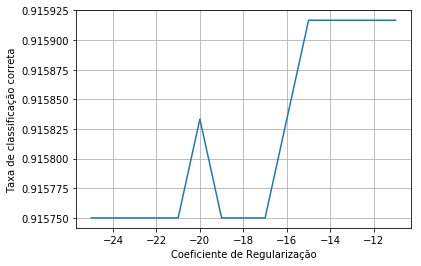

0.9159166666666667
Max value of c: -15


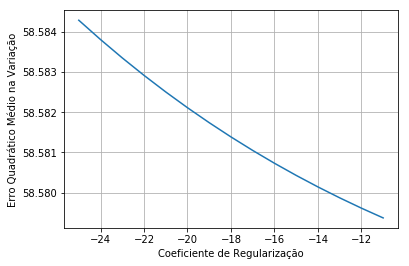

0.91575
Min value of err: -11


In [15]:
c, t, err = bestc(Xtr,Ytr,Yv,Xv,-16,-5,1,501)
plt.grid(True, which="both")
plt.plot(c,t)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Taxa de classificação correta')
plt.show()
print(max(t))
t_max = max(t)
idx_max = t.index(t_max)
print('Max value of c:',c[idx_max] )
plt.grid(True, which="both")
plt.plot(c,err)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Erro Quadrático Médio na Variação')
plt.show()
print(min(t))
err_min = min(err)
idx_min = err.index(err_min)
print('Min value of err:', c[idx_min])

